Linear regression can be used to predict continues values. The below example is for uber pricing with the distance traveled as the x data and the price of the ride as the y data.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

dist = [9, 1.4, 15, 73, 0.5, 9.1, 12, 5.8, 4.1] # miles
fare = [8.82, 8.09, 30, 81.4, 7.61, 19.91, 27.96, 26.96, 10.96] # $

x = np.asarray(dist).reshape((-1,1))
y = np.asarray(fare)
 
model = LinearRegression(fit_intercept=True, copy_X=True)
model.fit(x,y)

LinearRegression()

In [2]:
print('intercept: ', model.intercept_)
print('slope: ', model.coef_)

intercept:  10.32573065351679
slope:  [0.99136585]


Model for Linear Regression: $h(x) = \theta_0 + \theta_1 x $
In this example of uber pricing data, the resulting $\theta_0 = 10.3$ and $\theta_1 = 0.99$ 

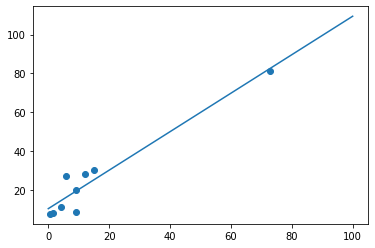

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x,y)

xfit = np.linspace(0,100,1000)

yfit = model.predict(xfit.reshape((-1,1)))

plt.plot(xfit, yfit)
plt.show()

# Linear Regression of Single Variable

Below we define the sum of squares cost function (note: $2m$ in denominator to simplfy the derivative whem optimizing).
$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $$

The quadratic nature of the cost function above means the cost surface is convex and thus has a global minimum.

$$ \theta^* = argmin_\theta J(\theta) $$ 

$$h_\theta(x) = \theta_0 + \theta_1 x$$

Use an optimization technique to solve for the optimal parameters $\theta^*$, then you can make predictions for new inputs $x$ using $h_{\theta^*}(x)$.

# Gradient Descent
An iterative optimization technique for finding the optimal parameters $\theta^*$ of the cost function. 

The learning rate/factor $\alpha$ controls how big of a step to take towards the optimal parameters. Below is the least mean squares update rule. the magnitude of the update is proportional to the error term. meaning if the prediction nearly matches the target, then the parameters are changed very little.

$$\theta_0 := \theta_0 - \alpha \frac{\partial J(\theta)}{\partial \theta_0} $$

$$\theta_1 := \theta_1 - \alpha \frac{\partial J(\theta)}{\partial \theta_1} $$

Run the above update steps until it converges. We define convergence as when $ \lvert \frac{\partial J(\theta}{\partial \theta_k} \rvert < ϵ$ where $ϵ$ is small. We monitor convergence by plotting the loss function and ensuring it goes down.

We can write the update steps using vector notation: 

$$\bar\theta := \bar\theta - \alpha \nabla_\theta J(\bar\theta) $$

Works well on convex cost surfaces but performs poorly when the cost function results in a non-convex cost surface.

$$\frac{\partial J}{\partial \theta_0} =  \frac{1}{m} \sum (h_\theta(x^{(i)}) -  y^{(i)})$$

$$\frac{\partial J}{\partial \theta_1} =  \frac{1}{m} \sum (h_\theta(x^{(i)}) -  y^{(i)})x^{(i)}$$

Generalized: $\frac{\partial J}{\partial \theta_j} =  \frac{1}{m} \sum (h_\theta(x^{(i)}) -  y^{(i)})x_j^{(i)}$



## Normal Equations
We can vectorize the above equations:

$h_\theta(\bar{x}) = \bar \theta^T \bar x $ where $\bar x = [1 , x_1]$ and $\bar \theta = [\theta_0, \theta_1]$


# Learning Rate Experiments

$$J(\theta) = (\theta_0 - 5)^2 + 10 $$
$$\frac{\partial J(\theta)}{\partial \theta_0} = 2\theta_0 - 10$$

The experiments run below demonstrate that $\alpha = 1$ is bad and things never converge. Takeaway: learning rate plays a critical role in the convergence of gradient descent to the optimal parameters

Summary:
Today i saw the connection between machine learning and optimization techniques being learned in Math 4630. The optimization techniques form the basis of finding the optimal parameters in many ML methods. These curve fitting applications in data science/ML are basically just optimization problems.

In [5]:
thetas = [1, 2, 7, 8, 25]
alphas = [1, 0.5, 0.4, 0.1, 0.01]
iters = 50

for t in thetas:
  for alpha in alphas:
    theta = t
    iters = 0
    while theta - 5.0 > 1e-2 and iters < 100:
      theta -= alpha * (2* theta - 10)
      iters += 1
    
    print(f'initial theta: {t} \t final theta: {theta} \t iterations: {iters} \t alpha: {alpha}' )
    print('-------------------') 

initial theta: 1 	 final theta: 1 	 iterations: 0 	 alpha: 1
-------------------
initial theta: 1 	 final theta: 1 	 iterations: 0 	 alpha: 0.5
-------------------
initial theta: 1 	 final theta: 1 	 iterations: 0 	 alpha: 0.4
-------------------
initial theta: 1 	 final theta: 1 	 iterations: 0 	 alpha: 0.1
-------------------
initial theta: 1 	 final theta: 1 	 iterations: 0 	 alpha: 0.01
-------------------
initial theta: 2 	 final theta: 2 	 iterations: 0 	 alpha: 1
-------------------
initial theta: 2 	 final theta: 2 	 iterations: 0 	 alpha: 0.5
-------------------
initial theta: 2 	 final theta: 2 	 iterations: 0 	 alpha: 0.4
-------------------
initial theta: 2 	 final theta: 2 	 iterations: 0 	 alpha: 0.1
-------------------
initial theta: 2 	 final theta: 2 	 iterations: 0 	 alpha: 0.01
-------------------
initial theta: 7 	 final theta: 3 	 iterations: 1 	 alpha: 1
-------------------
initial theta: 7 	 final theta: 5.0 	 iterations: 1 	 alpha: 0.5
-------------------
initia

# Linear Regression of Multiple Variables
Remember to use $x_0 = 1$ to make the vector multiplication work

$$h_\theta(\bar x) = \theta_0 x_0 + \theta_1 x_ 1 + ... + \theta_n x_n = \bar \theta^T \bar x$$

$$J(\bar \theta) = \frac{1}{2m} \sum_{i=1}^m (\bar \theta^T \bar x^{(i)} - y^{(i)})^2 $$

We can find the optimal parameters by minimizing the cost function using gradient descent or we can use the closed form solution by setting the gradient of the cost function equal to zero and solving the system of equations.


## Closed Form Solution
Set the gradient of the cost function equal to zero and solve the system of equations:

$$\nabla_\theta J = \bar 0$$

We use a $m$ by $n$ design matrix containing all our features for the training dataset:

$X = \begin{bmatrix}
\bar x ^{(1)T} \\
\bar x ^{(2)T} \\
\vdots \\
\bar x ^{(m)T}
\end{bmatrix}$ which is $m$ x $n$

We also use a $m$ by $1$ matrix containing all our targets for the training dataset:

$\bar \y = \begin{bmatrix}
\bar y^{(1)} \\
\bar y ^{(2)} \\
\vdots \\
\bar y ^{(m)}
\end{bmatrix}$


Finally we want to find the optimal parameters $\bar \theta^*$ which is an $n + 1$ x $1$ matrix 

Note: $\bar \theta^T \bar x = \bar x^T \bar \theta$ 

$$J(\bar \theta) = (X\bar\theta - \bar y) = \bar z$$

$$\bar z^T \bar z = \sum_i^m(z^{(i)})^2$$

The above is a nice way to write sum of squares in matrix form

$$J(\bar \theta) = \frac{1}{2m} (X\bar\theta - \bar y)^T (X\bar\theta - \bar y) $$

$$\nabla_\theta J(\theta) = X^TX \bar \theta - X^Ty$$

so if we set the above equal to $\bar 0$ and solve, we can get:

$$\bar \theta^* = (X^T X)^{-1}X^Ty$$

Inverting the matrix (pseudo or normal) is $O(n^3)$ so sometimes gradient descent is faster.


# Gradient Descent Methods
A training epoch is one cycle through the entire dataset.

## Batch
Computes the cost for the entire dataset and only then updates the model parameters for each epoch.

Performs model update at end of a training epoch.

### Pros
- Can parallelize the calculation of errors over the dataset and bring the results together to perform one model update
- 

### Cons
- Can get stuck in a local minumum (converges too soon) that is not the global min
- Often implemented such that the entire dataset must be able to fit into memory
- Slow training speed on large datasets due to the computational expense of using the entire dataset for each iteration

## Stochastic
Computes the cost for only a single sample at each epoch. 

Should be used for large datasets becuase it converges quickly after sampling only a small amount of the dataset, from which a batch or mini-batch technique can then be used to get finer 
tuned optimal parameters. 


## Stuff
If dataset is small, batch is always good
If dataset is large, batch will always converge but is costly/slow.

If dataset is small, stochastic is usually good but can be noisy and move off optimal local min due to noise in the updates from variations in the training samples at each step. 
If dataset is large, stochastic is good for getting and estimate since it makes early progress

For all datasets, stochastic gradient descent will have osciallations whereas bath will be fixed at the optimum. 